In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.layers.noise import AlphaDropout
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [26]:
input_shape = (28, 28, 1)
train_images_scaled = tf.expand_dims(train_images_scaled, axis=-1)
test_images_scaled = tf.expand_dims(train_images_scaled, axis=-1)

In [36]:

def build_cnn(activation,
              dropout_rate,
              optimizer):
    model = Sequential()
    
    if(activation == 'selu'):
        model.add(Conv2D(32, kernel_size=(3, 3),
                  activation=activation,
                  input_shape=input_shape,
                  kernel_initializer='lecun_normal'))
        model.add(Conv2D(64, (3, 3), activation=activation, 
                         kernel_initializer='lecun_normal'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(AlphaDropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(Dense(10, activation='sigmoid'))
    else:
        model.add(Conv2D(32, kernel_size=(3, 3),
                  activation=activation,
                  input_shape=input_shape))
        model.add(Conv2D(64, (3, 3), activation=activation))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation=activation))
        model.add(Dense(10, activation='sigmoid'))
    
    model.compile(
        loss='sparse_categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    
    return model
    

In [ ]:
#model.summary()

In [30]:
# Add the GELU function to Keras
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))
get_custom_objects().update({'gelu': Activation(gelu)})

# Add leaky-relu so we can use it as a string
get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))})

act_func = ['sigmoid', 'relu', 'leaky-relu', 'gelu', 'tanh' ]

In [31]:
result = []

for activation in act_func:
    print('\nTraining with -->{0}<-- activation function\n'.format(activation))
    
    model = build_cnn(activation=activation,
                      dropout_rate=0.2,
                      optimizer='adam') 
    
    history = model.fit(train_images_scaled, train_labels,
          validation_split=0.20,
          batch_size=32, 
          epochs=10,
          verbose=1,
          validation_data=(test_images_scaled, test_labels))
    
    result.append(history)
    
    K.clear_session()
    del model

print(result)


Training with -->sigmoid<-- activation function

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.5506 - accuracy: 0.4204 - val_loss: 0.5910 - val_accuracy: 0.7851
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5454 - accuracy: 0.8009 - val_loss: 0.4871 - val_accuracy: 0.8184
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4736 - accuracy: 0.8270 - val_loss: 0.4423 - val_accuracy: 0.8372
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4318 - accuracy: 0.8425 - val_loss: 0.4112 - val_accuracy: 0.8482
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3904 - accuracy: 0.8573 - val_loss: 0.3813 - val_accuracy: 0.8587
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3602 - accuracy: 0.8696 - val_loss: 0.3530 - val_accuracy: 0.8687
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3364 - a

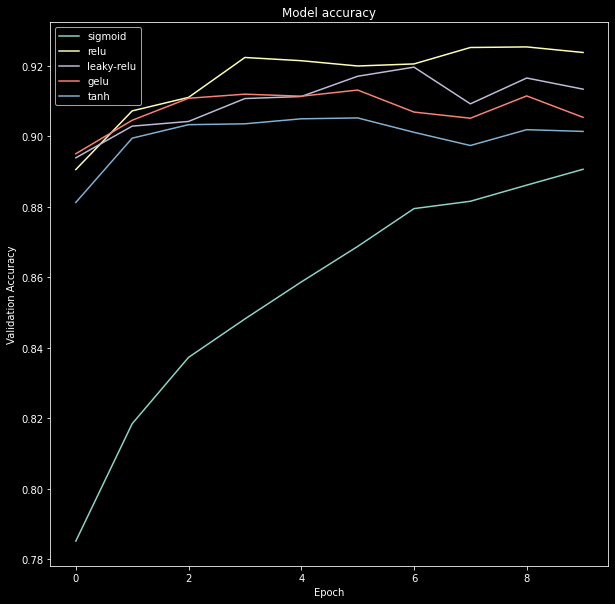

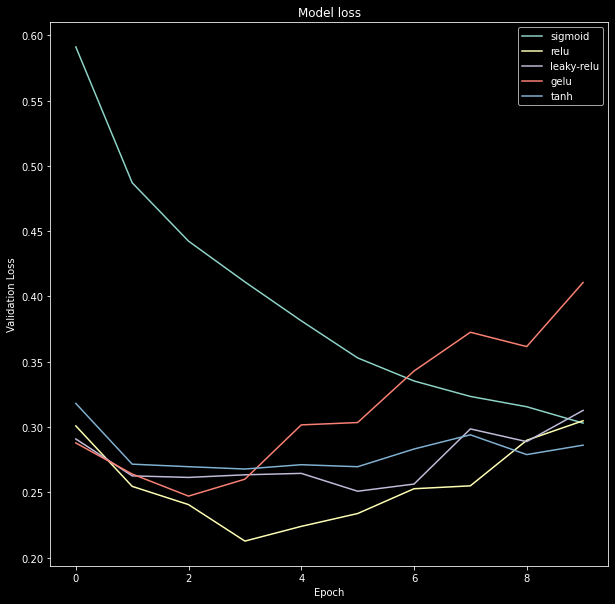

In [40]:
new_act_arr = act_func[0:]
new_results = result[0:]

def plot_act_func_results(results, activation_functions = []):
    plt.figure(figsize=(10,10))
    
    # Plot validation accuracy values
    for act_func in results:
        plt.plot(act_func.history['val_accuracy'])
        
    plt.title('Model accuracy')
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

    # Plot validation loss values
    plt.figure(figsize=(10,10))
    
    for act_func in results:
        plt.plot(act_func.history['val_loss'])
        
    plt.title('Model loss')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

plot_act_func_results(new_results, new_act_arr)